<a href="https://colab.research.google.com/github/MiguelArias1/Exercises-SyS-Miguel-Angel-Arias-Ocampo-2/blob/main/Simulaci%C3%B3nParcial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#función cero y pendiente
def my_ceropend(x,xhmax=10,xhmin=0):
  #cálculo de pendiente y cero
  m = (xhmax-xhmin)/(x.max()-x.min())
  b = xhmin - m*x.min()
  xh = m*x+b
  return xh


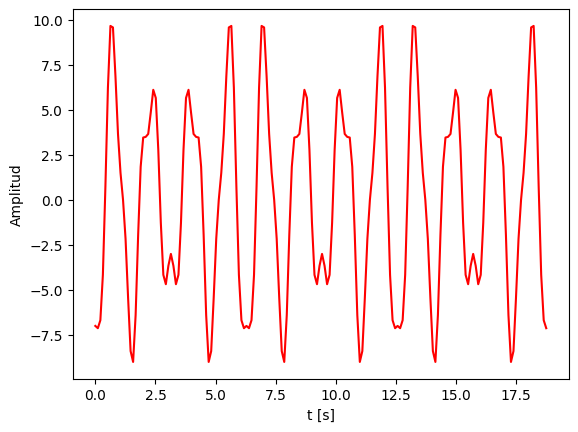

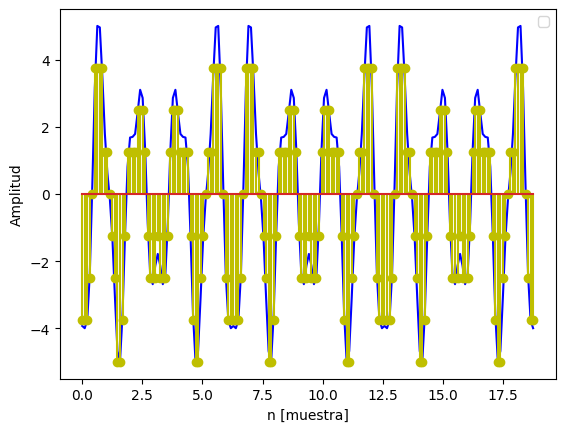

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

T1 = 1/2*np.pi #periodo señal 1
T2 = 2/5*np.pi #periodo señal 2
T3 = 1/5*np.pi #periodo señal 2
F1 = 1/T1
F2 = 1/T2
F3 = 1/T3
T = 2*np.pi #perido cuasiperiódica
Fs = 6*max(F1,F2,F3) #frecuencia muestreo
t = np.arange(0,3*T,1/Fs) #vector de tiempo, se muestran 3 periodos
x = -7*np.cos(4*t)-2*np.cos(5*t)+2*np.cos(10*t)
xhmax = 5
xhmin = -5
xh = my_ceropend(x,xhmax, xhmin).reshape(-1,1)#aplicar cero y pendiente de 0 a 10
#asegurar vector columna

#cuantizar
nbits = 3 #número bits
Ne = 2**nbits #cantidad de estados
res = (xhmax-xhmin)/Ne #resolución cuantización
ve = np.arange(xhmin,xhmax,res).reshape(-1,1)#vector de estados
#asegurar vector columna

xq = np.zeros(len(xh)) #señal cuantizada
for i in range(len(xh)): #recorrer señal cero y pendiente
    xq[i] = ve[np.argmin(cdist(xh[i].reshape(-1,1),ve))] #se cálcula la distancia desde cada punto al vector de estados

#gráficas de señales
plt.plot(t,x,'r',label='')
plt.xlabel('t [s]')
plt.ylabel('Amplitud')
plt.show()
plt.plot(t,xh,'b',label='')
plt.stem(t,xq,'y',label='')
plt.xlabel('n [muestra]')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

In [ ]:
from scipy.spatial.distance import cdist
x = -7*np.cos(4*t)-2*np.cos(5*t)+2*np.cos(10*t)
n_bits = 3 #Numero de bits
rmin = -5 #Valor en y minimo
rmax = 5 #Valor en y maximo
ve = np.linspace(rmin, rmax, 2**n_bits)
d = cdist(xh.reshape(-1,1),ve.reshape(-1,1))
d.shape
ind = np.argmin(d,axis = 1)
print(d.shape)
print(ind.shape)

(180, 8)
(180,)


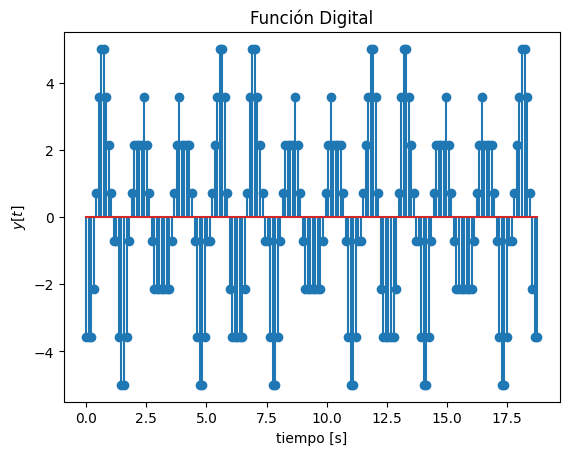

In [ ]:
xq = xh
for i in range (d.shape[0]):
  xq[i] = ve[ind[i]]
plt.stem(t, xq)
plt.xlabel('tiempo [s]')
plt.ylabel('$y[t]$')
plt.title("Función Digital")
plt.show()